(sanlc)=
# South African National Land Cover (SANLC)

Direct link to this notebook: [here](https://github.com/Jena-Earth-Observation-School/sdc-tools/blob/main/docs/content/02/02_00_SANLC.ipynb)

## Product description


The South African National Land Cover (SANLC) product available in the 
SALDi Data Cube (SDC) has been acquired from the 
[Department of Forest, Fisheries and the Environment of the Republic of South Africa](https://egis.environment.gov.za/sa_national_land_cover_datasets).

The product abbreviation used in this package is `sanlc`.

The following table shows the classes of the **2020 SANLC product**. Please note that classification schemes may vary 
between years. Reports and color palettes are available on the website mentioned above.

![SANLC](../../_assets/sanlc_classes.png)

_Source: Thompson, M., 2021, "2020 SANLC Technical Presentation", Presentation 
to the South African National Land Cover Data Users 2020 SANLC Data Launch_

## Loading data

The product is currently available for the years 2018, 2020 and 2022. A special parameter 
`sanlc_year` of the `load_product`-function can be used to select the year of interest:

In [2]:
from sdc.load import load_product

lc2022 = load_product(product="sanlc", 
                      vec="site06", 
                      sanlc_year=2022)
lc2022

<xarray.DataArray 'asset' (latitude: 5500, longitude: 6500)> Size: 36MB
dask.array<getitem, shape=(5500, 6500), dtype=uint8, chunksize=(5500, 6500), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 44kB -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 52kB 30.75 30.75 30.75 ... 32.05 32.05
    spatial_ref  int32 4B 4326
    time         datetime64[ns] 8B 2022-01-01
Attributes:
    nodata:   0

If the `sanlc_year`-parameter is not defined, the default value `None` is used and all 
available years will be loaded:

In [3]:
lc_all = load_product(product="sanlc", vec="site06")
lc_all

<xarray.DataArray 'asset' (time: 3, latitude: 5500, longitude: 6500)> Size: 107MB
dask.array<asset, shape=(3, 5500, 6500), dtype=uint8, chunksize=(3, 5500, 6500), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 44kB -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 52kB 30.75 30.75 30.75 ... 32.05 32.05
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 24B 2018-01-01 2020-01-01 2022-01-01
Attributes:
    nodata:   0

(xarray-shorts-3)=
## Xarray Shorts: Creating and applying a boolean mask

The SANLC product can be used to create a boolean mask, which can be applied to 
other datasets to extract only the pixels that are of interest. Xarray's 
[`isin`-method](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.isin.html)
makes this very easy. Just pass the values you want to keep as a list to the 
method and it will return a boolean mask.

In [4]:
classes = [3, 4]
mask = lc2022.isin(classes)
mask

<xarray.DataArray 'asset' (latitude: 5500, longitude: 6500)> Size: 36MB
dask.array<any-aggregate, shape=(5500, 6500), dtype=bool, chunksize=(5500, 6500), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 44kB -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 52kB 30.75 30.75 30.75 ... 32.05 32.05
    spatial_ref  int32 4B 4326
    time         datetime64[ns] 8B 2022-01-01
Attributes:
    nodata:   0

A boolean mask is a binary array filled with 1s and 0s. The 1s indicate the 
pixels that are of interest, the 0s the pixels that are not:

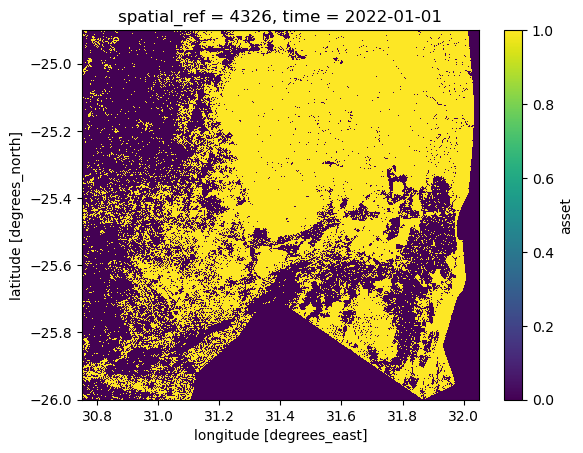

In [5]:
mask.plot()

Let's apply this mask to a Sentinel-2 dataset and plot the per-pixel mean of the 
`B08`-band (NIR):

In [6]:
s2 = load_product(product="s2_l2a", 
                  vec="site06", 
                  time_range=("2022-06-01", "2022-08-01"),
                  s2_apply_mask=True)

s2_masked = s2.where(mask)

[WARNING] Loading data for an entire SALDi site will likely result in performance issues as it will load data from multiple tiles. Only do so if you know what you are doing and have optimized your workflow! It is recommended to start with a small subset to test your workflow before scaling up.


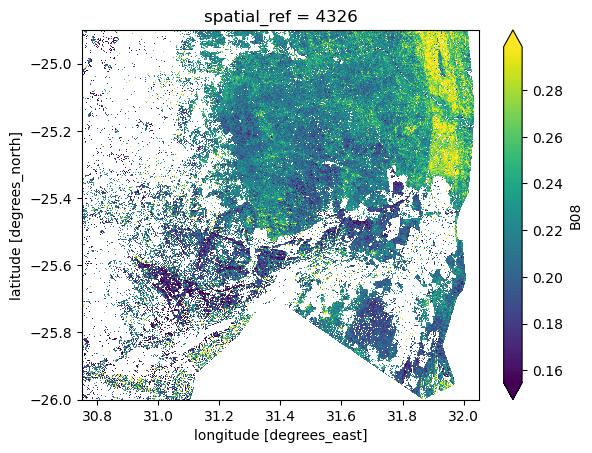

In [9]:
s2_masked.B08.mean(dim="time").plot(robust=True)

As expected, the mask has been applied to the dataset and only the pixels that 
are of interest are left. The rest has been set to `NaN`.